In [9]:
!pwd
!ls -al

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_orig = pd.read_csv('AmesHousing.csv')
df_orig.drop(['PID', 'Order'], axis=1, inplace=True)
df_orig.head()


/Users/manusokane/Desktop/University/UU Computer Science/COM747 - Data Science & Machine Learning/ML_HousePriceAssignment
total 2792
drwxr-xr-x   6 manusokane  staff     192 Apr  3 21:14 .
drwxr-xr-x@  7 manusokane  staff     224 Apr  3 20:32 ..
drwxr-xr-x  14 manusokane  staff     448 Apr  7 23:32 .git
-rw-r--r--@  1 manusokane  staff  963738 Apr  3 21:14 AmesHousing.csv
-rw-r--r--   1 manusokane  staff  454909 Apr  7 23:32 ML_HousePriceNotebook.ipynb
-rw-r--r--   1 manusokane  staff      31 Apr  3 20:36 README.md


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Data Analysis

Understand what type of features we have in our data
Check if any columns contain null values

In [10]:
numeric_features = df_orig.select_dtypes(include=['int', 'float'])
categorical_features = df_orig.select_dtypes(include=['object'])

print(f"Numeric features: {len(numeric_features.columns)}")
print(f"Numeric features: {numeric_features.columns}\n")
print(f"Categorical features: {len(categorical_features.columns)}")
print(f"Categorical features: {categorical_features.columns}\n\n")

Numeric features: 37
Numeric features: Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

Categorical features: 43
Categorical features: Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 

In [11]:
# Check for missing values
total_columns_with_missing_values = df_orig.isnull().any().sum()
print(f"Total number of columns with missing values: {total_columns_with_missing_values}\n")

# Check for missing values in numeric features
missing_numeric = numeric_features.columns[numeric_features.isnull().any()]
missing_numeric = missing_numeric.sort_values(ascending=False)
print(f"Missing values in numeric features: {missing_numeric}\n")

# Check for missing values in categorical features
missing_categorical = categorical_features.columns[categorical_features.isnull().any()]
missing_categorical = missing_categorical.sort_values(ascending=False)
print(f"Missing values in categorical features: {missing_categorical}\n")



Total number of columns with missing values: 27

Missing values in numeric features: Index(['Total Bsmt SF', 'Mas Vnr Area', 'Lot Frontage', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'BsmtFin SF 2', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Bsmt Half Bath', 'Bsmt Full Bath'],
      dtype='object')

Missing values in categorical features: Index(['Pool QC', 'Misc Feature', 'Mas Vnr Type', 'Garage Type', 'Garage Qual',
       'Garage Finish', 'Garage Cond', 'Fireplace Qu', 'Fence', 'Electrical',
       'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Exposure',
       'Bsmt Cond', 'Alley'],
      dtype='object')



# Data Cleaning

What to do with missing values?
Encoding?

Graph showing NaN values below


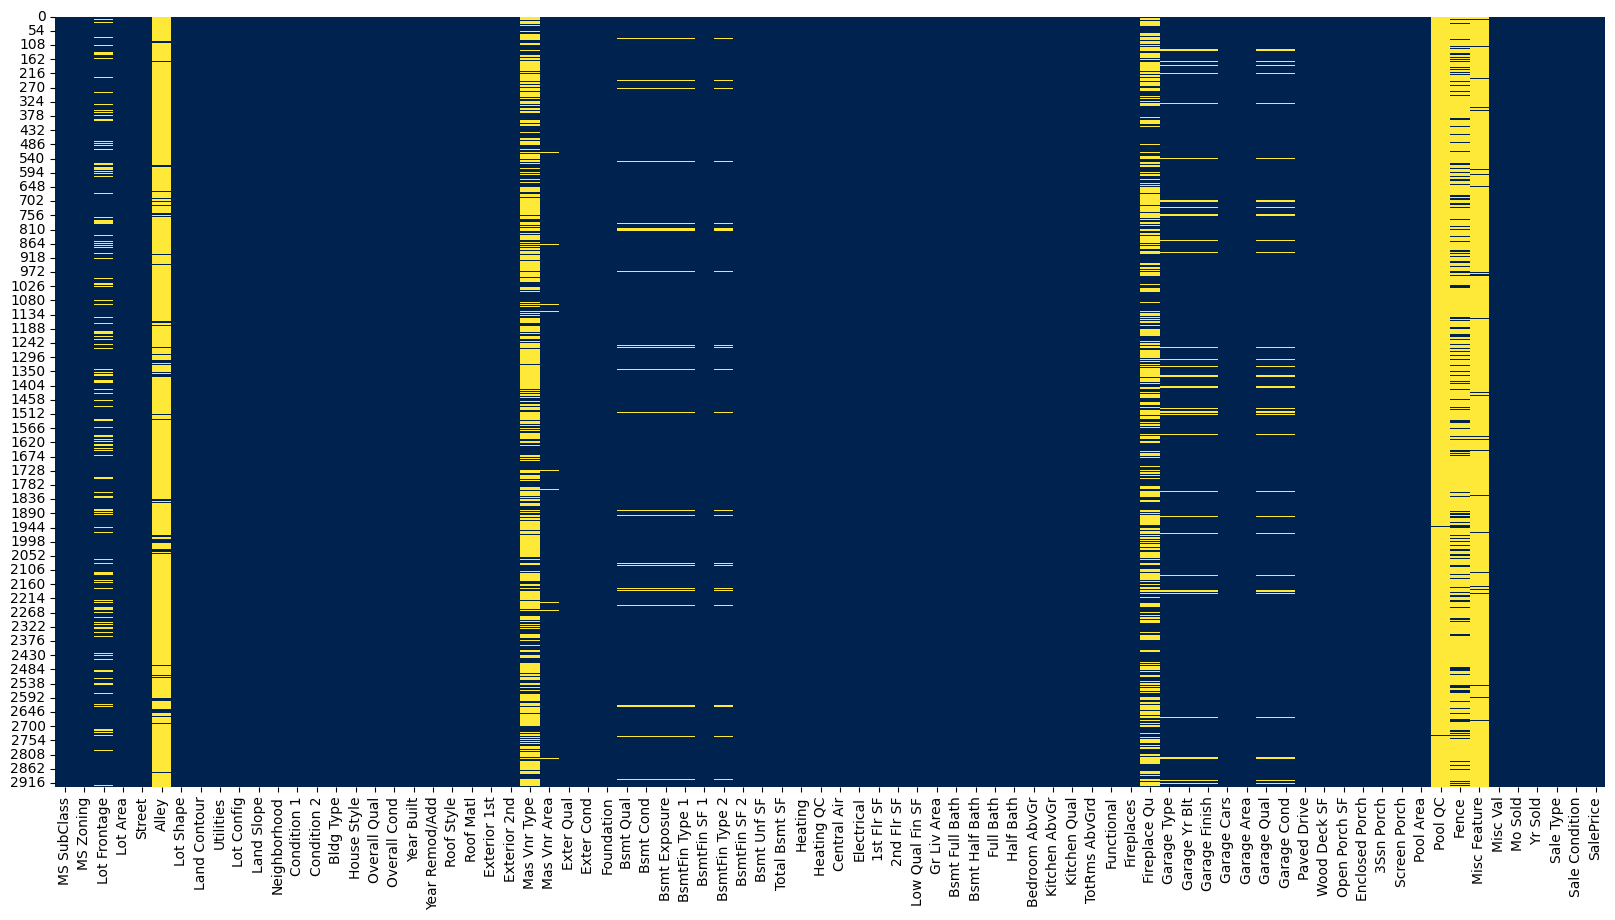

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_orig.isnull(), cbar=False, cmap='cividis')
plt.show()

Alley / Pool QC / Fence / Misc Feature contains mainly NaN values

description of the data mentions that alley / fence mean no access. Pool Qc means no pool

fireplaceQu has NaN values when fireplace is 0

Columns with numeric values: use mean in place of NaN
Columns with catergorical values: fill empty values with 


In [13]:
# Calculate the missing count and percentage for each column
missing_count = df_orig.isnull().sum()
missing_percentage = (missing_count / len(df_orig)) * 100

# Combine the results into a DataFrame
missing_data = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing Percentage': missing_percentage.values
})

# Filter columns with missing values and sort by percentage in descending order
missing_data = missing_data[missing_data['Missing Count'] > 0]
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Display the table
print("Missing values summary:")
print(missing_data)

Missing values summary:
            Column  Missing Count  Missing Percentage
71         Pool QC           2917           99.556314
73    Misc Feature           2824           96.382253
5            Alley           2732           93.242321
72           Fence           2358           80.477816
24    Mas Vnr Type           1775           60.580205
56    Fireplace Qu           1422           48.532423
2     Lot Frontage            490           16.723549
62     Garage Qual            159            5.426621
63     Garage Cond            159            5.426621
58   Garage Yr Blt            159            5.426621
59   Garage Finish            159            5.426621
57     Garage Type            157            5.358362
31   Bsmt Exposure             83            2.832765
34  BsmtFin Type 2             81            2.764505
30       Bsmt Cond             80            2.730375
29       Bsmt Qual             80            2.730375
32  BsmtFin Type 1             80            2.730375
25  

Split into numerical & catergorical tables

In [14]:
# Separate numerical and categorical columns
numerical_cols = df_orig.select_dtypes(include=['int', 'float']).columns
categorical_cols = df_orig.select_dtypes(include=['object']).columns

# Calculate missing count and percentage for numerical columns
numerical_missing_count = df_orig[numerical_cols].isnull().sum()
numerical_missing_percentage = (numerical_missing_count / len(df_orig)) * 100

numerical_missing_data = pd.DataFrame({
    'Column': numerical_missing_count.index,
    'Missing Count': numerical_missing_count.values,
    'Missing Percentage': numerical_missing_percentage.values
}).sort_values(by='Missing Percentage', ascending=False)

# Calculate missing count and percentage for categorical columns
categorical_missing_count = df_orig[categorical_cols].isnull().sum()
categorical_missing_percentage = (categorical_missing_count / len(df_orig)) * 100

categorical_missing_data = pd.DataFrame({
    'Column': categorical_missing_count.index,
    'Missing Count': categorical_missing_count.values,
    'Missing Percentage': categorical_missing_percentage.values
}).sort_values(by='Missing Percentage', ascending=False)

# Filter out rows with 0 missing count
numerical_missing_data = numerical_missing_data[numerical_missing_data['Missing Count'] > 0]
categorical_missing_data = categorical_missing_data[categorical_missing_data['Missing Count'] > 0]

# Display results
print("Numerical Columns Missing Data Summary:")
print(numerical_missing_data)

print("\nCategorical Columns Missing Data Summary:")
print(categorical_missing_data)

Numerical Columns Missing Data Summary:
            Column  Missing Count  Missing Percentage
1     Lot Frontage            490           16.723549
24   Garage Yr Blt            159            5.426621
7     Mas Vnr Area             23            0.784983
16  Bsmt Full Bath              2            0.068259
17  Bsmt Half Bath              2            0.068259
25     Garage Cars              1            0.034130
26     Garage Area              1            0.034130
10     Bsmt Unf SF              1            0.034130
8     BsmtFin SF 1              1            0.034130
11   Total Bsmt SF              1            0.034130
9     BsmtFin SF 2              1            0.034130

Categorical Columns Missing Data Summary:
            Column  Missing Count  Missing Percentage
38         Pool QC           2917           99.556314
40    Misc Feature           2824           96.382253
2            Alley           2732           93.242321
39           Fence           2358           80.477816

heatmap axis need changed to fill in missing columns. 
Label better 

/var/folders/24/7_kjf_453cndtcnfr8nzkdnh0000gn/T/ipykernel_10154/2605105763.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_num_filled[col].fillna(df_num_filled[col].mean(), inplace=True)


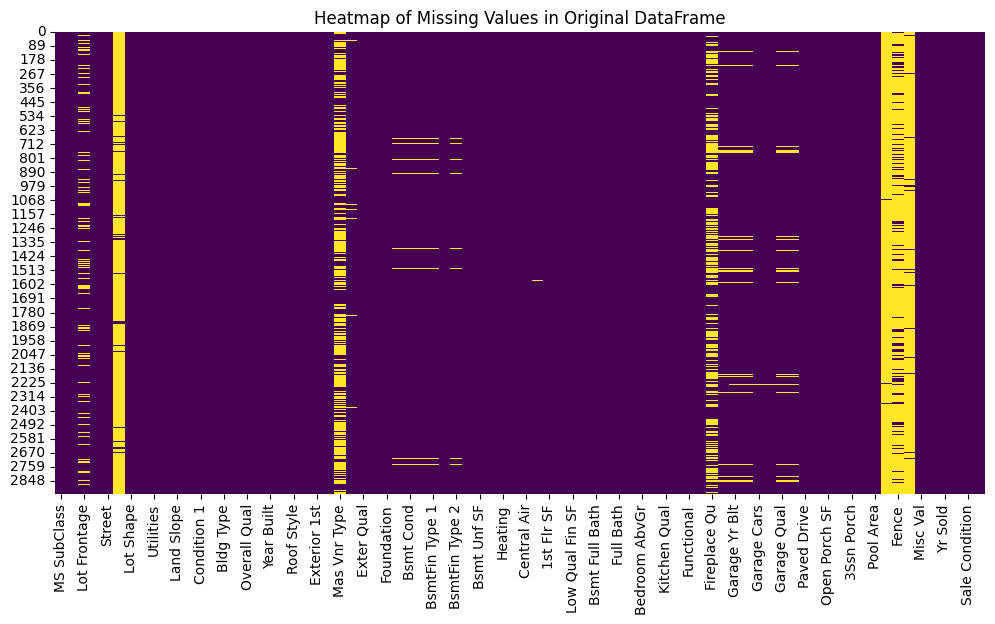

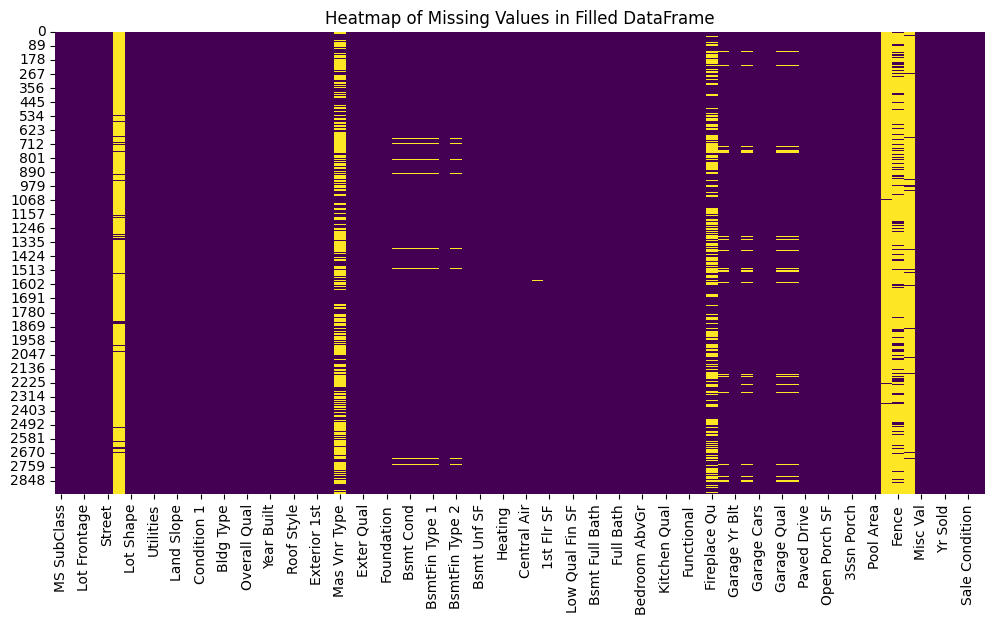

In [15]:
# Create a copy of the original DataFrame to avoid overwriting
df_num_filled = df_orig.copy()

# Fill missing values in numerical columns with their column mean
numerical_cols = df_num_filled.select_dtypes(include=['int', 'float']).columns
for col in numerical_cols:
    if df_num_filled[col].isnull().sum() > 0:  # Check if the column has missing values
        df_num_filled[col].fillna(df_num_filled[col].mean(), inplace=True)

# Heatmap for the original DataFrame (df_orig)
plt.figure(figsize=(12, 6))
sns.heatmap(df_orig.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values in Original DataFrame")
plt.show()

# Heatmap for the filled DataFrame (df_num_filled)
plt.figure(figsize=(12, 6))
sns.heatmap(df_num_filled.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values in Filled DataFrame")
plt.show()

encode for categorical columns

try label & ordinal?

In [16]:
df_cat_filled = df_num_filled.copy()

df_cat_filled['Bsmt Qual'].fillna('None', inplace=True)
df_cat_filled['Bsmt Cond'].fillna('None', inplace=True)
df_cat_filled['Bsmt Exposure'].fillna('None', inplace=True)
df_cat_filled['BsmtFin Type 1'].fillna('None', inplace=True)
df_cat_filled['BsmtFin Type 2'].fillna('None', inplace=True)
df_cat_filled['Fireplace Qu'].fillna('None', inplace=True)
df_cat_filled['Garage Finish'].fillna('None', inplace=True)
df_cat_filled['Garage Qual'].fillna('None', inplace=True)
df_cat_filled['Garage Cond'].fillna('None', inplace=True)
df_cat_filled['Pool QC'].fillna('None', inplace=True)
df_cat_filled['Fence'].fillna('None', inplace=True)
df_cat_filled.loc[df_cat_filled['Electrical'].isna(),'Electrical'] ='FuseF'

print("Unique values in 'Electrical':", df_cat_filled['Electrical'].unique())
print("Unique values in 'alley':", df_cat_filled['Alley'].unique())

Unique values in 'Electrical': ['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
Unique values in 'alley': [nan 'Pave' 'Grvl']


/var/folders/24/7_kjf_453cndtcnfr8nzkdnh0000gn/T/ipykernel_10154/4155121624.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat_filled['Bsmt Qual'].fillna('None', inplace=True)
/var/folders/24/7_kjf_453cndtcnfr8nzkdnh0000gn/T/ipykernel_10154/4155121624.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [17]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Create a copy of the original DataFrame to avoid overwriting
df_encoded = df_cat_filled.copy()

# Separate categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Check for columns containing the 'nan' category
for col in df_encoded.columns:
    if 'nan' in df_encoded[col].astype(str).unique():
        print(f"Column '{col}' contains 'nan' as a category.")

# Define ordinal columns and their order
ordinal_columns = {
    'Pool QC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],  # mainly no pools, if PoolArea is 0
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], 
    'Fireplace Qu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
    'Garage Cond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Qual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Finish': ['None', 'Unf', 'RFn', 'Fin'],
    'Bsmt Exposure': ['None', 'No', 'Mn', 'Av', 'Gd'], 
    'BsmtFin Type 2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
    'BsmtFin Type 1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
    'Bsmt Qual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
    'Bsmt Cond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
    'Electrical': ['FuseP', 'FuseF', 'Mix', 'FuseA', 'SBrkr'], 
}

# Apply Ordinal Encoding for ordinal columns
for col, order in ordinal_columns.items():
    if col in categorical_cols:
        ordinal_encoder = OrdinalEncoder(categories=[order])
        df_encoded[col] = ordinal_encoder.fit_transform(df_encoded[[col]])

#'Garage Type': ['No', 'Yes'],  
#'Misc Feature': ['Bad', 'Average', 'Good', 'Excellent']    
#'Alley': ['No', 'Yes'],  
#'Mas Vnr Type': ['No', 'Yes'],  # Example ordinal column

# Apply Label Encoding for the remaining categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    if col not in ordinal_columns:  # Skip ordinal columns
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Display the transformed DataFrame
df_encoded.head()


Column 'Alley' contains 'nan' as a category.
Column 'Mas Vnr Type' contains 'nan' as a category.
Column 'Garage Type' contains 'nan' as a category.
Column 'Misc Feature' contains 'nan' as a category.


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,5,141.0,31770,1,2,0,3,0,0,...,0,0.0,0.0,5,0,5,2010,9,4,215000
1,20,4,80.0,11622,1,2,3,3,0,4,...,0,0.0,3.0,5,0,6,2010,9,4,105000
2,20,5,81.0,14267,1,2,0,3,0,0,...,0,0.0,0.0,1,12500,6,2010,9,4,172000
3,20,5,93.0,11160,1,2,3,3,0,0,...,0,0.0,0.0,5,0,4,2010,9,4,244000
4,60,5,74.0,13830,1,2,0,3,0,4,...,0,0.0,3.0,5,0,3,2010,9,4,189900


#Feature

define target for our dataset

In [66]:
y = df_encoded['SalePrice']
X = df_encoded.drop(columns=['SalePrice'])

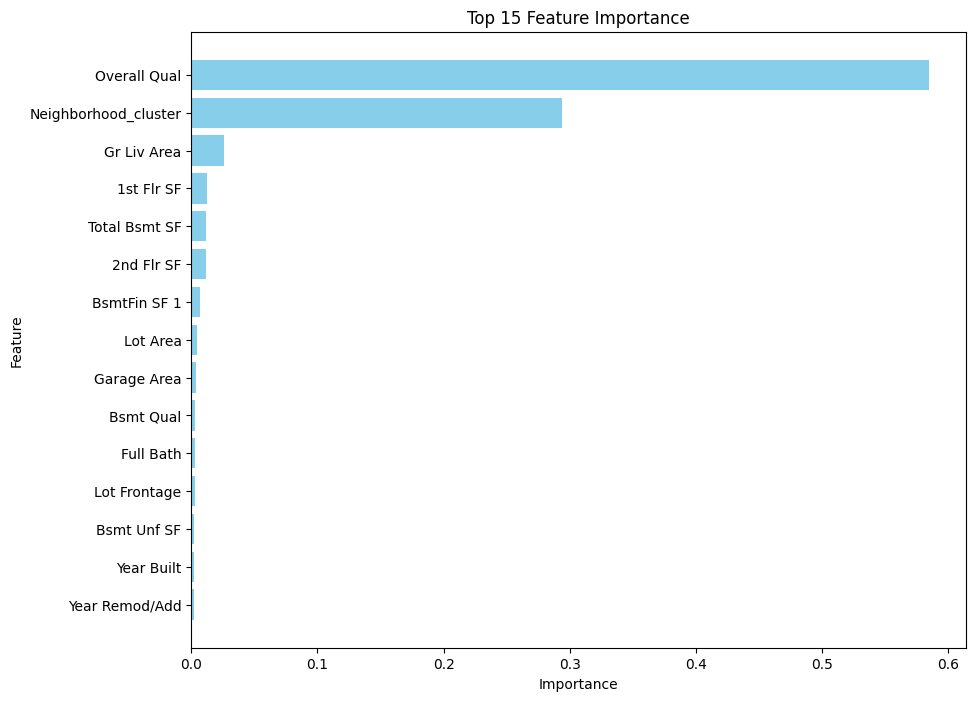

In [67]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)


# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_15_features = importance_df.head(15)

# Plot feature importance for the top 15 features
plt.figure(figsize=(10, 8))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [23]:
import shap 
#from sklearn.ensemble import RandomForestRegressor

# Train a model (e.g., Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X)

KeyboardInterrupt: 

In [68]:
print(df_cat_filled['Neighborhood'])
print(df_encoded['Neighborhood'])


0         NAmes
1         NAmes
2         NAmes
3         NAmes
4       Gilbert
         ...   
2925    Mitchel
2926    Mitchel
2927    Mitchel
2928    Mitchel
2929    Mitchel
Name: Neighborhood, Length: 2930, dtype: object
0       15
1       15
2       15
3       15
4        8
        ..
2925    14
2926    14
2927    14
2928    14
2929    14
Name: Neighborhood, Length: 2930, dtype: int64


Cluster Neighborhoods Based on Sales Prices and Other Variables

Use K-Means Clustering or another clustering algorithm to group neighborhoods based on their average sales prices and other relevant features.

The new Neighborhood_cluster variable will represent the cluster each neighborhood belongs to. This variable will be included in the dataset for training the model.

In [69]:
from sklearn.cluster import KMeans

# Select features for clustering (e.g., Neighborhood and SalePrice)
clustering_features = df_encoded[['Neighborhood', 'SalePrice']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
df_encoded['Neighborhood_cluster'] = kmeans.fit_predict(clustering_features)

# Inspect the clusters
print(df_encoded[['Neighborhood', 'Neighborhood_cluster']].drop_duplicates())

      Neighborhood  Neighborhood_cluster
0               15                     0
1               15                     2
2               15                     3
4                8                     0
6               25                     0
...            ...                   ...
2422             0                     4
2666            20                     1
2737             7                     1
2788            12                     3
2892            10                     0

[97 rows x 2 columns]


Train two models:

Without Clustering: Use the original dataset without the Neighborhood_cluster variable.
With Clustering: Include the Neighborhood_cluster variable in the dataset.

In [70]:
# Model without clustering
X_without_cluster = df_encoded.drop(columns=['SalePrice', 'Neighborhood_cluster'])
y = df_encoded['SalePrice']

model_without_cluster = RandomForestRegressor(random_state=42)
model_without_cluster.fit(X_without_cluster, y)

# Model with clustering
X_with_cluster = df_encoded.drop(columns=['SalePrice'])
model_with_cluster = RandomForestRegressor(random_state=42)
model_with_cluster.fit(X_with_cluster, y)


RandomForestRegressor(random_state=42)

In [89]:
# Check if the highest and lowest neighborhoods exist in the training data
print("Highest neighborhood:", highest_neighborhood)
print("Lowest neighborhood:", lowest_neighborhood)
print("Unique neighborhoods in training data:", df_encoded['Neighborhood'].unique())

print("Features used during training (with clustering):", X_with_cluster.columns)
print("Features used during training (without clustering):", X_without_cluster.columns)



Highest neighborhood: 18
Lowest neighborhood: 13
Unique neighborhoods in training data: [15  8 25 17 24  2 16 19  0 18 23 22  9  3 20 11  4 21  7  5  6  1 14 26
 13 27 10 12]
Features used during training (with clustering): Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt 

Create dummy test data with identical houses but different neighbourhoods (one in the highest and one in the lowest average sales price neighborhood).

In [96]:
from sklearn.preprocessing import LabelEncoder

# Identify neighborhoods with the highest and lowest average sales prices
neighborhood_avg_prices = df_encoded.groupby('Neighborhood')['SalePrice'].mean()

# Filter neighborhoods that exist in the training data
valid_neighborhoods = df_encoded['Neighborhood'].unique()
neighborhood_avg_prices = neighborhood_avg_prices.loc[valid_neighborhoods]

# Identify the highest and lowest neighborhoods
highest_neighborhood = neighborhood_avg_prices.idxmax()
lowest_neighborhood = neighborhood_avg_prices.idxmin()

# Debugging: Ensure the neighborhoods exist in the training data
print("Highest neighborhood:", highest_neighborhood)
print("Lowest neighborhood:", lowest_neighborhood)
print("Unique neighborhoods in training data:", valid_neighborhoods)

# Create dummy test data
dummy_data = pd.DataFrame({
    'Neighborhood': [highest_neighborhood, lowest_neighborhood],
    # Add other features with identical values
    'Lot Area': [15000, 15000],
    'Overall Qual': [8, 8],
    'Overall Cond': [5, 5],
    'Year Built': [2000, 2000],
    'Gr Liv Area': [1500, 1500],
    # Add other features as needed
})

# Add a placeholder for SalePrice
dummy_data['SalePrice'] = 0  # Use a placeholder value for SalePrice

# Add cluster information to the dummy data
dummy_data['Neighborhood_cluster'] = kmeans.predict(dummy_data[['Neighborhood', 'SalePrice']])

# Debugging: Print the input to KMeans.predict
print("Input to KMeans.predict:")
print(dummy_data[['Neighborhood', 'SalePrice']])

# Align dummy_data for model_with_cluster
training_features_with_cluster = X_with_cluster.columns
dummy_data_with_cluster = dummy_data.reindex(columns=training_features_with_cluster, fill_value=0)

# Align dummy_data for model_without_cluster
training_features_without_cluster = X_without_cluster.columns
dummy_data_without_cluster = dummy_data.reindex(columns=training_features_without_cluster, fill_value=0)


# Predict with both models using the aligned dummy data
predictions_without_cluster = model_without_cluster.predict(dummy_data_without_cluster)
predictions_with_cluster = model_with_cluster.predict(dummy_data_with_cluster)

# Compare predictions
print("Predictions without clustering:", predictions_without_cluster)
print("Predictions with clustering:", predictions_with_cluster)

Highest neighborhood: 18
Lowest neighborhood: 13
Unique neighborhoods in training data: [15  8 25 17 24  2 16 19  0 18 23 22  9  3 20 11  4 21  7  5  6  1 14 26
 13 27 10 12]
Input to KMeans.predict:
   Neighborhood  SalePrice
0            18          0
1            13          0
Predictions without clustering: [198743.92 198547.92]
Predictions with clustering: [261220.73 261520.73]


Use SHAP to analyze the feature importance in the model with clustering.

Expected Outcome:
Dummy Test Data:

The model with clustering should predict a higher price for the house in the highest-priced neighborhood and a lower price for the house in the lowest-priced neighborhood.
SHAP Analysis:

The Neighborhood_cluster variable should appear as one of the most important features in the model with clustering.

In [ ]:
import shap

# Create a SHAP explainer for the model with clustering
explainer = shap.TreeExplainer(model_with_cluster)
shap_values = explainer.shap_values(X_with_cluster)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_with_cluster)